In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa
import math
import scipy.stats as stats

In [2]:
X=np.genfromtxt("hw05_data_set.csv", delimiter = ",")  #1000x2

In [3]:
def plot_current_state(centroids, memberships, X):   
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
    if memberships is None:
        plt.plot(X[:, 0], X[:, 1], ".", markersize = 8, color = "black")
    else:
        for c in range(K):
            plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 8,
                     color = cluster_colors[c])
    for c in range(K):
        plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 10, 
                 markerfacecolor = cluster_colors[c], markeredgecolor = "black")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    
def plot_original(centroids):
    class_means=np.array([[+0.0, +5.5],
                        [-5.5, +0.0],[+0.0, +0.0],
                    [+5.5, +0.0], [+0.0, -5.5]])
    
    class_covariances = np.array([[[+4.8, +0.0], 
                           [+0.0, +0.4]],
                          [[+0.4, +0.0], 
                           [+0.0, +2.8]],
                          [[+2.4, +0.0], 
                           [+0.0, +2.4]],
                          [[+0.4, +0.0], 
                           [+0.0, +2.8]],
                          [[+4.8, +0.0], 
                           [+0.0, +0.4]]])
    x1_interval = np.linspace(-8, +8, 1201)
    x2_interval = np.linspace(-8, +8, 1201)
    x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
    X_grid = np.vstack((x1_grid.flatten(), x2_grid.flatten())).T
    D1 = stats.multivariate_normal.pdf(X_grid, mean = class_means[0, :],
                               cov = class_covariances[0, :, :])
    D2 = stats.multivariate_normal.pdf(X_grid, mean = class_means[1, :],
                                       cov = class_covariances[1, :, :])
    D3 = stats.multivariate_normal.pdf(X_grid, mean = class_means[2, :],
                                       cov = class_covariances[2, :, :])
    D4 = stats.multivariate_normal.pdf(X_grid, mean = class_means[3, :],
                                       cov = class_covariances[3, :, :])
    D5 = stats.multivariate_normal.pdf(X_grid, mean = class_means[4, :],
                                       cov = class_covariances[4, :, :])
    
    a=[D1,D2,D3,D4,D5]

    for i in range(len(a)):
        D= a[i]
        #print(D.shape)
        D = D.reshape((len(x1_interval), len(x2_interval)))
        plt.contour(x1_grid, x2_grid, D, levels = [0.05],
            colors= "black", linestyles = "dashed")
        
def plot_data(centroids,covariance):
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
    x1_interval = np.linspace(-8, +8, 1201)
    x2_interval = np.linspace(-8, +8, 1201)
    x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
   

    
    for i in range(K):
        D=stats.multivariate_normal.pdf(np.concatenate((x1_grid.flatten()[:,None],x2_grid.flatten()[:,None]), axis = 1), centroids[i], covariances[i]).reshape(1201,1201)
        plt.contour(x1_grid, x2_grid, D, levels = [0.05],colors= cluster_colors[i], linestyles = "solid")

def find_densities(centroids,X,covariance):
    
    D1=stats.multivariate_normal.pdf(X,
                      mean = centroids[0],
                              cov = covariance[:2,:2])
    D2=stats.multivariate_normal.pdf(X,
                      mean = centroids[1],
                              cov = covariance[2:4,:2])
    
    D3=stats.multivariate_normal.pdf(X,
                      mean = centroids[2],
                              cov = covariance[4:6,:2])
    D4=stats.multivariate_normal.pdf(X,
                      mean = centroids[3],
                              cov = covariance[6:8,:])
    D5=stats.multivariate_normal.pdf(X,
                      mean = centroids[4],
                              cov = covariance[8:,:])

    return D1,D2,D3,D4,D5
    
def update_centroids(memberships, X):
    centroids = np.vstack([np.mean(X[memberships == k, :], axis = 0) for k in range(K)])
    
    #covariance=np.vstack([np.matmul((X[memberships == k, :]-centroids[k,:]).T,(X[memberships == k, :]-centroids[k,:])) / np.sum(memberships==k) for k in range(K)])
    covariance= np.vstack(np.cov(X[memberships==k].T) for k in range(K))
    return centroids,covariance

def update_memberships(centroids, X):
 
    D = spa.distance_matrix(centroids, X)
    memberships = np.argmin(D, axis = 0)
    return(memberships)


In [4]:
centroids=np.genfromtxt("hw05_initial_centroids.csv", delimiter = ",")  #5x2
N = X.shape[0]
K = centroids.shape[0]
D = X.shape[1]
memberships= update_memberships(centroids, X)
priors=[]
for c in range(K):
    priors.append(X[memberships == c].shape[0] / N)
priors=np.array(priors)
covariances=[]
for c in range(K):
            matrix_emp = [[0.0, 0.0], [0.0, 0.0]]
            for j in range(X[memberships == c].shape[0]):
                covar = np.matmul(((X[memberships == c])[j,:] - centroids[c,:])[:, None], ((X[memberships == c])[j,:] - centroids[c,:][None, :]))
                matrix_emp += covar
            covariances.append(matrix_emp / X[memberships == c].shape[0])


In [5]:
def update_covariance(X,centroids):
    covariances = []
    for k in range(K):
        matrix_emp = [[0.0, 0.0], [0.0, 0.0]]
        for i in range(N):
            covar = np.matmul((X[i] - centroids[k])[:, None], (X[i] - centroids[k])[None, :])*H[k][i]
            matrix_emp+= covar
        covariances.append(matrix_emp / np.sum(H[k], axis = 0))
    return covariances

def update_priors(X,H):
    priors =[]
    for k in range(K):
        priors.append(np.sum(H[k], axis = 0)/N)
    return np.array(priors)
def find_probability(centroids,covariances,priors):
    prob = []
    for c in range(K):
        posterior = priors[c]*stats.multivariate_normal(centroids[c], covariances[c]).pdf(X)
        prob.append(posterior)
    return prob

In [6]:
iteration = 1
while iteration <= 100:
    
    prob=find_probability(centroids,covariances,priors)
    H = np.vstack([prob[c]/np.sum(prob, axis = 0) for c in range(K)])
    
    centroids = (np.vstack([np.matmul(H[k], X)/np.sum(H[k], axis = 0) for k in range(K)]))
    covariances = update_covariance(X,centroids)
    priors=update_priors(X,H)
    
    iteration +=1
    
memberships=np.argmax(H, axis = 0)    
print(centroids)
print(covariances)




[[ 0.15012647 -0.10601062]
 [ 5.63782309 -0.01720488]
 [-0.06077502 -5.60092697]
 [-0.08487478  5.45469879]
 [-5.4828878  -0.08822559]]
[array([[ 2.23917135, -0.08732817],
       [-0.08732817,  2.62449954]]), array([[0.46372783, 0.14783709],
       [0.14783709, 2.987893  ]]), array([[ 5.09350359, -0.04985614],
       [-0.04985614,  0.37635563]]), array([[4.79109789, 0.16264805],
       [0.16264805, 0.40645243]]), array([[ 0.44543006, -0.19868021],
       [-0.19868021,  2.61822406]])]


[[ 0.15012647 -0.10601062]
 [ 5.63782309 -0.01720488]
 [-0.06077502 -5.60092697]
 [-0.08487478  5.45469879]
 [-5.4828878  -0.08822559]]


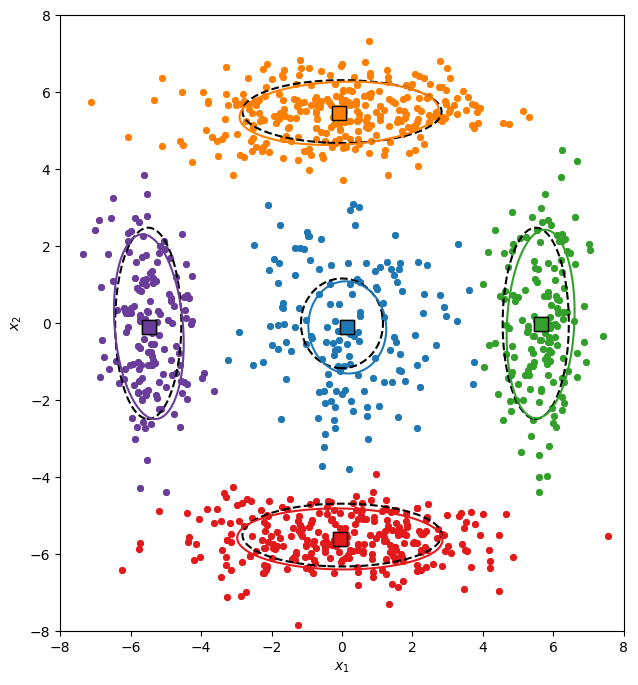

In [8]:
plt.figure(figsize = (16, 8))    
plt.subplot(1, 2, 1)
plot_current_state(centroids, memberships, X)
#plt.subplot(1, 2, 2)
plot_current_state(centroids, memberships, X)
print(centroids)
plot_original(centroids)
plot_data(centroids,covariances)
plt.show()
